# Exercice 1

## Question (a)

In [1]:
from numpy import *

l_x = [0.053, 0.067, 0.095, 0.16, 0.21]
l_y = [8.1, 9.95, 15, 25, 30]
m_x = mean(l_x)
print(f"Moyenne de x: {m_x:.3f}")
var_x = var(l_x)
print(f"Variance de x: {var_x:.3f}")
sigma_x = sqrt(var_x)
print(f"L'écart-type de x: {sigma_x:.3f}")
m_y = mean(l_y)
print(f"Moyenne de y: {m_y:.3f}")
var_y = var(l_y)
print(f"Variance de y: {var_y:.3f}")
sigma_y = sqrt(var_y)
print(f"L'écart-type de y: {sigma_y:.3f}")

Moyenne de x: 0.117
Variance de x: 0.004
L'écart-type de x: 0.059
Moyenne de y: 17.610
Variance de y: 72.810
L'écart-type de y: 8.533


## Question (b)

In [2]:
def ma_covariance(l_c, l_d):
    n = len(l_c) # len(l_c) est le nombre d'éléments dans l_c
    #somme = 0 
    #for i in range(n): 
    #    somme = somme + l_c[i]*l_d[i]
    somme = sum([l_c[i] * l_d[i] for i in range(n)])
    #somme = sum([c*d for (c,d) in zip(l_c, l_d)])
    covariance = 1/n*somme - mean(l_c)*mean(l_d)
    return covariance

In [3]:
cov_xy = ma_covariance(l_x, l_y)
print(f"Covariance: {cov_xy:.3f}")

Covariance: 0.504


## Question (c)

In [4]:
r = cov_xy/(sigma_x*sigma_y)
print(f"Coefficient de corrélation: {r:.3f}")
a = cov_xy/var_x
b = m_y - a*m_x
print(f"droite de régression est z = {a:.3f}x+{b:.3f}")

Coefficient de corrélation: 0.996
droite de régression est z = 143.310x+0.843


In [5]:
x = 0.25
print(f"tension pour intensité {x} est {a*x+b:.3f}")

tension pour intensité 0.25 est 36.670


## Question (d)

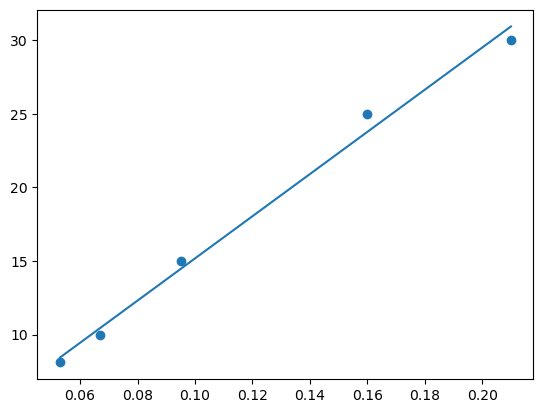

In [6]:
from matplotlib.pyplot import *
scatter(l_x, l_y)
l_z = [a*x+b for x in l_x]
plot(l_x, l_z)
show()

## Exercice 2

Moyenne de x: 49.500
Variance de x: 833.250
L'écart-type de x: 28.866
Moyenne de y: 8.523
Variance de y: 2.902
L'écart-type de y: 1.704
Covariance: 39.762
Coefficient de corrélation: 0.809
droite de régression est z = 0.048x+6.161


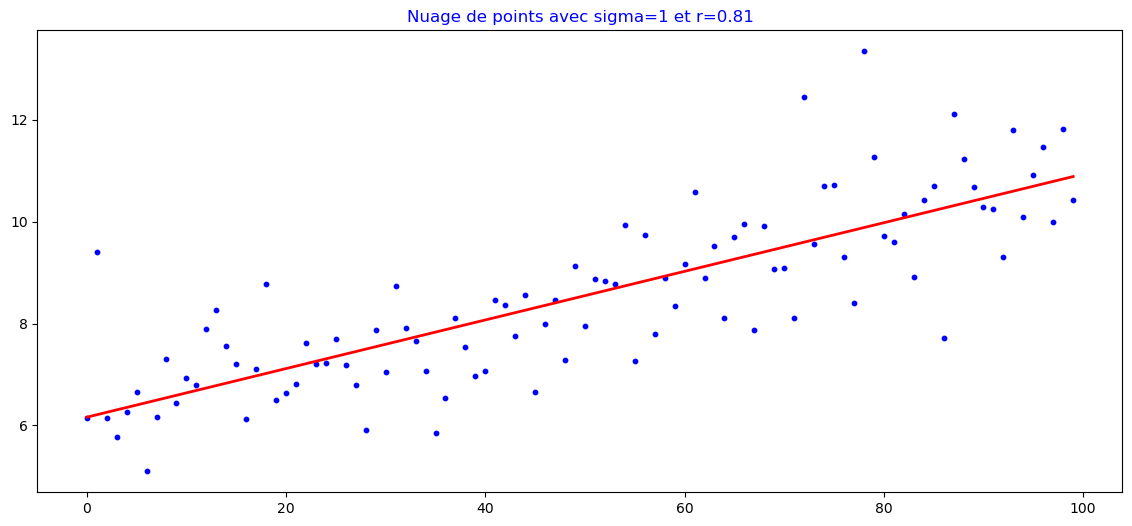

In [7]:
from numpy import *
from matplotlib.pyplot import *

def donnees(sigma):
    n = 100
    l_x = list(range(n))  # l_x = [0,1,....,99]
    l_bruit = random.normal(loc=2, scale=sigma, size=100)
    l_y = [0.05*l_x[i] + 4 + l_bruit[i] for i in range(n)]
    return l_x, l_y

def ma_covariance(l_c, l_d):
    n = len(l_c) # len(l_c) est le nombre d'éléments dans l_c
    #somme = 0 
    #for i in range(n): 
    #    somme = somme + l_c[i]*l_d[i]
    somme = sum([l_c[i] * l_d[i] for i in range(n)])
    #somme = sum([c*d for (c,d) in zip(l_c, l_d)])
    covariance = 1/n*somme - mean(l_c)*mean(l_d)
    return covariance

sigma = 1
l_x, l_y = donnees(sigma)
    

m_x = mean(l_x)
print(f"Moyenne de x: {m_x:.3f}")
var_x = var(l_x)
print(f"Variance de x: {var_x:.3f}")
sigma_x = sqrt(var_x)
print(f"L'écart-type de x: {sigma_x:.3f}")
m_y = mean(l_y)
print(f"Moyenne de y: {m_y:.3f}")
var_y = var(l_y)
print(f"Variance de y: {var_y:.3f}")
sigma_y = sqrt(var_y)
print(f"L'écart-type de y: {sigma_y:.3f}")

cov_xy = ma_covariance(l_x, l_y)
print(f"Covariance: {cov_xy:.3f}")

r = cov_xy/(sigma_x*sigma_y)
print(f"Coefficient de corrélation: {r:.3f}")
a = cov_xy/var_x
b = m_y - a*m_x
print(f"droite de régression est z = {a:.3f}x+{b:.3f}")


figure(figsize=(14, 6))
title(f'regression linéaire de données avec bruit avec sigma={sigma} et r={r:.1f}', color='blue', fontsize='14')
scatter(l_x, l_y, s=10, color="blue")
l_z = [a*x+b for x in l_x]
plot(l_x, l_z, color="red", linewidth=2)
title(f"Nuage de points avec sigma={sigma} et r={r:.2f}")
show()

## Question (c)

- Plus `sigma` est petit, plus le nuage de points est proche de la droite de régression. C'est prévisible, car plus `sigma` est petit, moins les données sont dispersées autour de la moyenne, donc moins il y a du "bruit". Plus les données sont alignés, plus `r` est proche de $\pm 1$.
- Au contraire, plus `sigma` est grand, plus il y a dispersion autour de la moyenne, donc le nuage de points est moins bien aligné et `r` est plus proche de $0$.

# Exercice 3

## Question (a)

$X$ suit une loi géométrique de paramètre $p=1/6$.

$$\mathbb{E}(X) = \frac{1}{p}=6~~~ \mathbb{V}(X) = \frac{1-p}{p^2}=30$$

## Questions (b), (c)

In [8]:
from numpy import *
from matplotlib.pyplot import *

def premier_succes():
    rang = 1
    while random.randint(1, 7) != 6:
        rang += 1
    return rang

def moyenne_premier_succes(nb_essai):
    S = 0
    for _ in range(nb_essai):
        S += premier_succes()
    return  S/nb_essai
    
nb_essai = 100
moy = moyenne_premier_succes(nb_essai)
print(f"La moyenne pour {nb_essai} tentatives est {moy}")
nb_essai = 100000
moy = moyenne_premier_succes(nb_essai)
print(f"La moyenne pour {nb_essai} tentatives est {moy}")

La moyenne pour 100 tentatives est 6.67
La moyenne pour 100000 tentatives est 5.98443


## Question (d)

- La loi des grands nombres dit que la moyenne tend vers l'espérance.
- Pour être plus précis: Si pour $$X_i$ sont des v....

# Exercice 4

## Question (a)

- Les variables aléatoires $X_i$ sont indépendantes et suivent la même loi géométrique de paramètre $p=1/6$. Nous avons vu pour l'exercice précédent que leur moyenne est $\mu=6$ et leur variance est $\sigma^2=30$.
- Le théorème central limite dit que $\overline{X} _n=\frac{X_1+\cdots X_n}{n}$ peut être approximé
par la loi normale $\cal{N}(\mu, \frac{\sigma^2}{n})$. Donc la moyenne de la loi normale est $\mu=6$,
la variance est $\frac{\sigma^2}{n}=\frac{30}{n}$ et l'écart est $\frac{\sqrt{30}}{\sqrt{n}}$

## Questions (b) à (d)

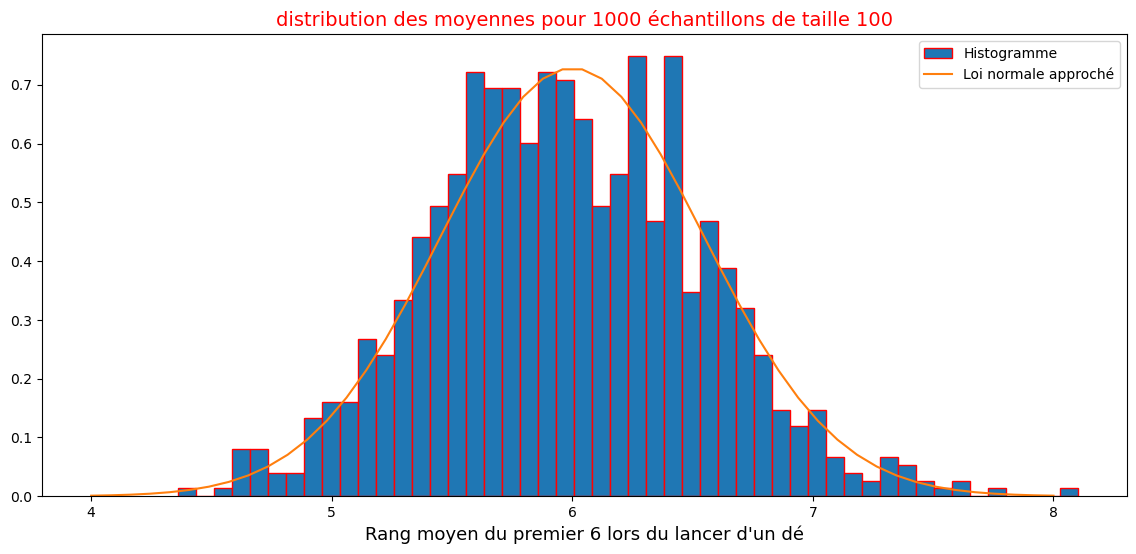

In [9]:
from numpy import *
from matplotlib.pyplot import *
from scipy import stats

def premier_succes():
    rang = 1
    while random.randint(1, 7) != 6:
        rang += 1
    return rang

def moyenne_premier_succes(nb_essai):
    S = 0
    for _ in range(nb_essai):
        S += premier_succes()
    return  S/nb_essai

nb_moyennes = 1000
nb_essai = 100

moyennes = []
for _ in range(nb_moyennes):
    moyenne = moyenne_premier_succes(nb_essai)
    moyennes.append(moyenne)

#print(moyennes)

figure(figsize=(14, 6))
hist(moyennes,  
     bins = 50, # on regroupe les donnés en 20 classes, on a donc 20 rectangles
     density = True, # on affiche les fréquences, pas les effectifs
     edgecolor = "red",
     label = "Histogramme" # pas demandé
     )
title(f'distribution des moyennes pour {nb_moyennes} échantillons de taille {nb_essai}', 
      color='red', fontsize=14)


mu = 6
sigma = sqrt(30/nb_essai)

def f(x):
    y = stats.norm.pdf(x, loc=mu, scale=sigma)
    return y

L_x = linspace(4, 8)
L_y = [f(x) for x in L_x]
xlabel("Rang moyen du premier 6 lors du lancer d'un dé", fontsize=13)
# L_y = stats.norm.pdf(l_x, loc = 6, scale=sigma)
plot(L_x, L_y, label="Loi normale approché") # label pas demandé
legend() # pas demandé
show()

# Exercice 5

In [10]:
from numpy import *
from matplotlib.pyplot import *

from numpy import *

def machine(nb_cylindres):
    X = random.normal(loc=82.7, scale=13E-4, size=nb_cylindres)
    return X

def interval_confiance(echantillon):
    n = len(echantillon)
    moyenne = mean(echantillon)
    b1 = moyenne - 1.96*13E-4/sqrt(n)
    b2 = moyenne + 1.96*13E-4/sqrt(n)
    return b1, b2

taille_echantillon = 200
echantillon = machine(taille_echantillon)
b1, b2 = interval_confiance(echantillon)
print(f"Intervalle de confiance : [{b1:.4f}, {b2:.4f}]")

mu = 82.7
nb_echantillons = 10000
nb_bons_intervalles = 0
for i in range(nb_echantillons):
    echantillon = machine(taille_echantillon)
    b1, b2 = interval_confiance(echantillon)
    if b1 <= mu <= b2:
        nb_bons_intervalles += 1
f = nb_bons_intervalles/nb_echantillons # pourcentage de bons intervalles
        
print(f'Le pourcentage de "bons" intervalles est {f}')

Intervalle de confiance : [82.6997, 82.7001]
Le pourcentage de "bons" intervalles est 0.9455


# Exercice 6

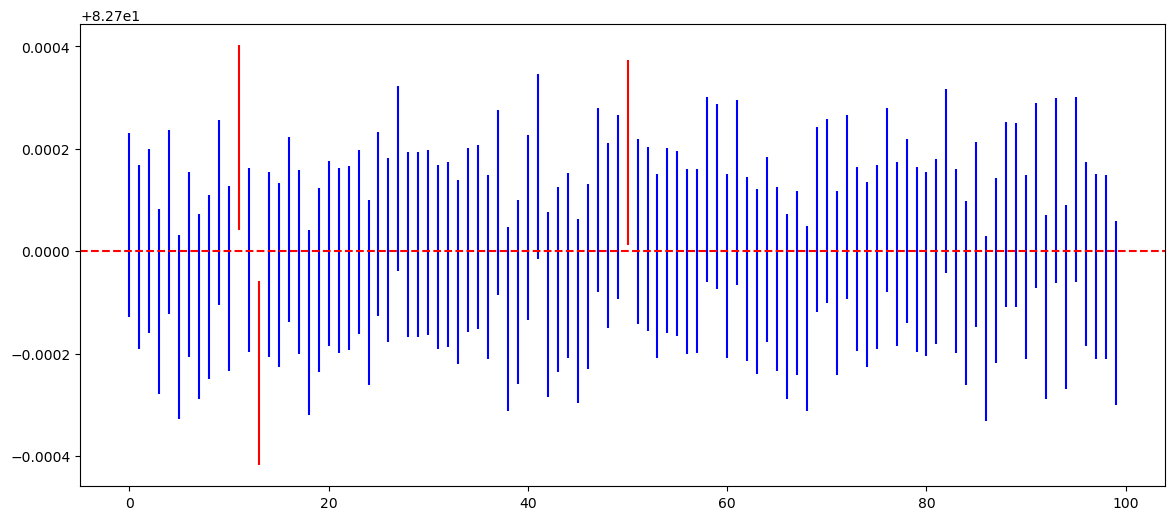

In [11]:
from numpy import *
from matplotlib.pyplot import *

from numpy import *

def machine(nb_cylindres):
    X = random.normal(loc=82.7, scale=13E-4, size=nb_cylindres)
    return X

def interval_confiance(echantillon):
    n = len(echantillon)
    moyenne = mean(echantillon)
    b1 = moyenne - 1.96*13E-4/sqrt(n)
    b2 = moyenne + 1.96*13E-4/sqrt(n)
    return b1, b2

taille_echantillon = 200
nb_echantillons = 100

figure(figsize=(14,6))

for i in range(nb_echantillons):
    echantillon = machine(taille_echantillon)
    b1, b2 = interval_confiance(echantillon)
    if b1 <= mu <= b2:
        vlines(x=i, ymin=b1, ymax=b2, color="blue")
    else:
        vlines(x=i, ymin=b1, ymax=b2, color="red")

axhline(y=82.7, color='red', linestyle="--")
show()

# Exercice 7

24


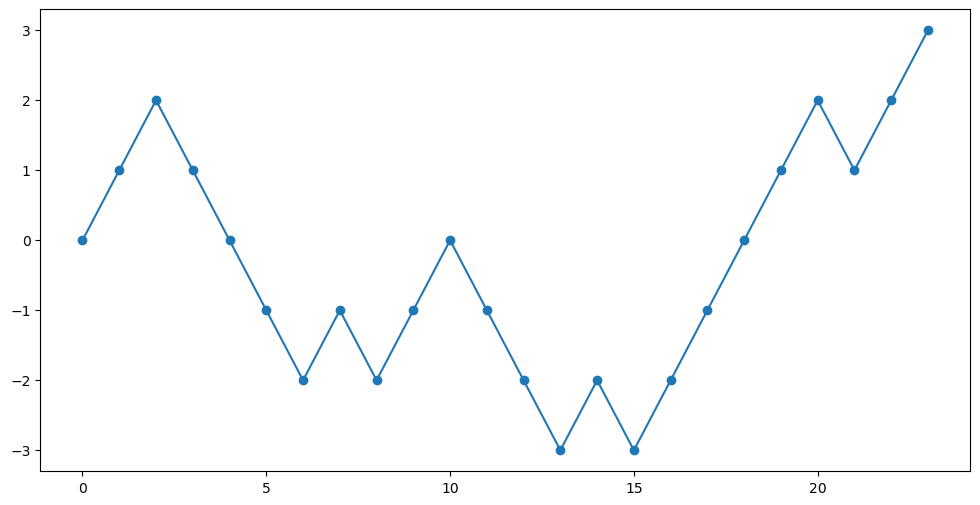

In [112]:
from numpy import *
from matplotlib.pyplot import *

N = 3

trajectoire = [0]
position = 0
while position != N:
    position += random.choice([-1,1])
    trajectoire.append(position)
print(len(trajectoire))

figure(figsize=(12,6))
plot(trajectoire, '-o')
show()


In [115]:
from numpy import *
from matplotlib.pyplot import *

def tomber_eau(longueur_rive):
    position = 0
    for i in range(longueur_rive):
        position += random.choice([-1,1])
        if position == 3:
            return 1
    return 0
        
longueur_rive = 15
nb_trajectoires = 30000
nb_tombeau_eau = 0
for _ in range(nb_trajectoires):
    nb_tombeau_eau += tomber_eau(longueur_rive)
frequence_tombeau_eau = nb_tombeau_eau/nb_trajectoires
print(f"La probabilité de tomber à l'eau est {frequence_tombeau_eau}")

La probabilité de tomber à l'eau est 0.45206666666666667


[0.5479, 0.0, 0.0, 0.1248, 0.0, 0.09435, 0.0, 0.0699, 0.0, 0.05265, 0.0, 0.04335, 0.0, 0.0365, 0.0, 0.03055]


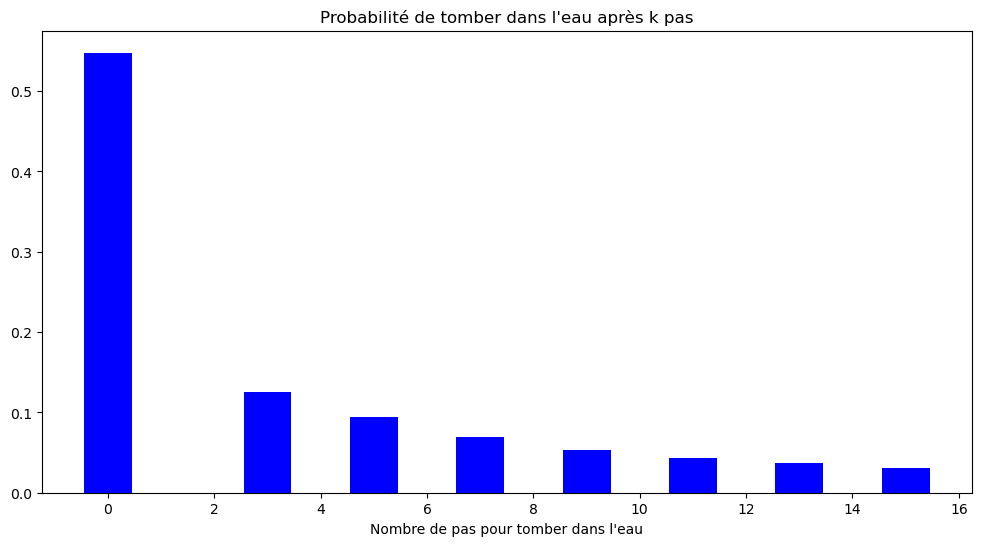

In [117]:
from numpy import *
from matplotlib.pyplot import *
import math

def tomber_eau(longueur_rive):
    position = 0
    nb_pas = 0
    for i in range(longueur_rive):
        position += random.choice([-1,1])
        nb_pas += 1
        if position == 3:
            return nb_pas
    return 0
               
longueur_rive = 15
l_x = list(range(longueur_rive+1))
l_y = [0] * (longueur_rive+1)

nb_trajectoires = 20000
for _ in range(nb_trajectoires):
    nb_pas = tomber_eau(longueur_rive)
    l_y[nb_pas] += 1

l_y = [y/nb_trajectoires for y in l_y]
print(l_y)
figure(figsize=(12, 6))
bar(l_x, l_y, color="blue", width=0.9)
title("Probabilité de tomber dans l'eau après k pas")
xlabel("Nombre de pas pour tomber dans l'eau")
show()